# PhotoPointCollection: PhotoMap

A _PhotoPoint_ gather the basic information of a photometric observation: flux, variance, wavelength/bandname, date etc. When combined, photopoints are powerful tools, they form SED (as a function of wavelength), lightcurves (as a function of time), and photomap (as a function of sky-location). The photopoints combination form a _PhotoPointCollection_ object. The _SED_, _LightCurve_, and _PhotoMap_ objects inherate from _PhotoPointCollection_. 

#### We discuss here the _PhotoMap_ case, which gather photopoints and coordinates.

In [1]:
## plot within the notebook
%matplotlib inline
import warnings
## No annoying warnings
warnings.filterwarnings('ignore')
# - Astrobject Modules
from astrobject import instrument
from astropy import units, table

## Extract a **_PhotoMap_** from the isolated stars of a given image (_Instrument_) in 4 Steps.

1 — Load the _Instrument_ instance

In [ ]:
sdss = instrument("data/sdss_PTF10qjq_g.fits")
# let's see how it looks like
pl = sdss.show()

2 — Download the associated sdss catalogue (to find the isolated stars)

In [3]:
sdss.download_catalogue(source="sdss",column_filters={"gmag":"13..22"})

3 — define what 'isolated' means (this is a Catalogue information)

In [4]:
sdss.catalogue.define_around(15*units.arcsec)

**Remark** by default when downloading a catalogue, a default 'isolation of 10arcsec' is set. Here let's use 15.

The coordinates of the isolated star are therefore accessible as follows:

In [5]:
mask_isolatedstars = sdss.catalogue.starmask*sdss.catalogue.isolatedmask
ra,dec = sdss.catalogue.ra[mask_isolatedstars], sdss.catalogue.dec[mask_isolatedstars]

4 — run get aperture photometry at the given coordinate in the sdss image (_using sep_)

In [6]:
# ra and dec are list of coordinate. 
# This means: give me a collection of photopoints for each coordinates (in radec) within an aperture of 5 arcsec.
photomap = sdss.get_photopoint(ra, dec, radius=5, runits="arcsec", wcs_coords=True)

**Remak** the coordinates (ra, dec) could be a single values. In such a case, a _PhotoPoint_ is returned, not a _PhotoMap_.

**_Tip_** you can give pixel coordinates instead of world coordinates. If so, set 'wcs_coords' to False [default]

## PhotoMap, what does it has?

A _PhotoMap_ is a _PhotoPointCollection_ whose 'id' to access the individual _PhotoPoint_ are coordinates (csv). The methods 'coords_to_id()' and 'id_to_coords()' enable the conversion.) 

It consequently has, in addition to all the _PhotoPointCollection_ attributes, coordinates associated options (radec, xy [need a wcs solution set to get both]). An advance visualisation method 'display_voronoy' enables to quicky see spacial structures.


#### Visualisation: Voronoy Tessellation Map ([what is that ?](https://en.wikipedia.org/wiki/Voronoi_diagram))

you can overplot on the sdss.show() image any value of the photomap accessible by its get() method.

**_structure of the code_** the 'get()' method loops over all the 'id' (following the 'list_id' sorting) and runs 'get()' on each individual _PhotoPoint_. You can get this way any values known by a _PhotoPoint_

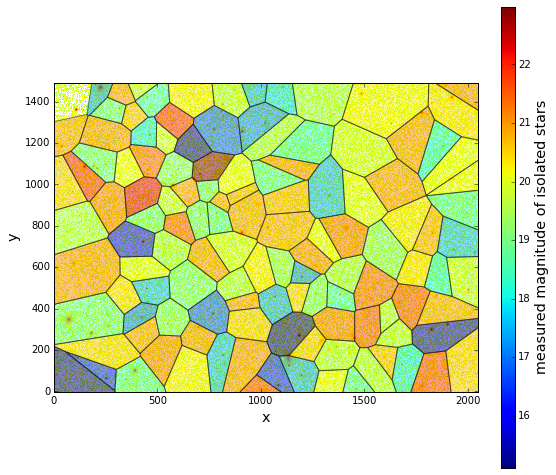

In [8]:
pl = sdss.show(show=False)
pl_vor = photomap.display_voronoy(pl["ax"],"mag", cblabel="measured magnitude of isolated stars")